# 1 Introduction

This project is about a kind of lottery ticket called "array 3", which is a means of raising money by selling numbered tickets and giving prizes to the holders of the number drawn at random. And you have three ways to get the prize:
1. you choose a number from 000 to 999. If your choice matches the prize number，then you get 1040 RMB.
2.  you choose one number --A from 0 to 9 twice and choose another different number -- B as the same time,such as'112'. If the prize number includes two 'A'and one 'B'(3 cases in total like 112,121,211)，then you get 346 RMB.
3. you choose three different numbers from 0 to 9, such as'123'.If the prize number includes '1', '2'and '3'(6 cases in total)，then you get 173 RMB.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as st
%matplotlib inline

# 2 data & clean

The datas of the first csv come from the [Official website of the lottery ticket](https://www.lottery.gov.cn/historykj/history.jspx?_ltype=pls). I copy the datas and save them as csv.

## 2-1 infomation of the data

In [2]:
url_all = "data-all.csv"
df_all = pd.read_csv(url_all)

In [3]:
df_allcopy=df_all.copy()
df_allcopy.dtypes

time_serial     int64
password       object
way1            int64
way1_number     int64
way2            int64
way2_number     int64
way3           object
way3_number     int64
total_sales    object
time           object
dtype: object

The `time_serial` means a serial number to the time.

The `password` is the prize number

The `way1`, `way2`, `way3` are the amounts of winning bets for the three ways, and those `way_number` mean the prizes to the ways.

In [4]:
df_allcopy.head(5)

,time_serial,password,way1,way1_number,way2,way2_number,way3,way3_number,total_sales,time
0,20098,4 4 9,8148,1040,10839,346,0,173,"25,888,230",2020/5/27
1,20097,9 3 5,9422,1040,0,346,31680,173,"25,527,170",2020/5/26
2,20096,7 1 8,11124,1040,0,346,40734,173,"26,909,786",2020/5/25
3,20095,4 2 5,12017,1040,0,346,34704,173,"24,962,754",2020/5/24
4,20094,3 2 8,17743,1040,0,346,58498,173,"26,033,312",2020/5/23


## 2-2 clean the data

In [5]:
df_allcopy['time'] = pd.to_datetime(df_allcopy['time'])

#split the 'password' into three columns
df_allcopy['password_1'] = df_allcopy['password'].str.split(' ').str[0].astype(int)
df_allcopy['password_2'] = df_allcopy['password'].str.split(' ').str[1].astype(int)
df_allcopy['password_3'] = df_allcopy['password'].str.split(' ').str[2].astype(int)

# chenge the '- -' in df_allcopy['way3'] with '0' and chenge the values into 'int'
df_allcopy.loc[df_allcopy['way3']=='- -', 'way3'] = 0
df_allcopy['way3'] = df_allcopy['way3'].astype(int)

# dope the '- -' in df_allcopy['total_sales'] and chenge the values into 'float'
df_allcopy.loc[df_allcopy['total_sales']=='- -', 'total_sales'] = np.nan
df_allcopy['total_sales'] = df_allcopy['total_sales'].str.replace(',', '').astype(float)


df_A = df_allcopy.set_index('time')
df_A.head(5)

,time_serial,password,way1,way1_number,way2,way2_number,way3,way3_number,total_sales,password_1,password_2,password_3
time,,,,,,,,,,,,
2020-05-27,20098,4 4 9,8148,1040,10839,346,0,173,25888230.0,4,4,9
2020-05-26,20097,9 3 5,9422,1040,0,346,31680,173,25527170.0,9,3,5
2020-05-25,20096,7 1 8,11124,1040,0,346,40734,173,26909786.0,7,1,8
2020-05-24,20095,4 2 5,12017,1040,0,346,34704,173,24962754.0,4,2,5
2020-05-23,20094,3 2 8,17743,1040,0,346,58498,173,26033312.0,3,2,8


In [6]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5505 entries, 2020-05-27 to 2004-11-14
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_serial  5505 non-null   int64  
 1   password     5505 non-null   object 
 2   way1         5505 non-null   int64  
 3   way1_number  5505 non-null   int64  
 4   way2         5505 non-null   int64  
 5   way2_number  5505 non-null   int64  
 6   way3         5505 non-null   int32  
 7   way3_number  5505 non-null   int64  
 8   total_sales  1345 non-null   float64
 9   password_1   5505 non-null   int32  
 10  password_2   5505 non-null   int32  
 11  password_3   5505 non-null   int32  
dtypes: float64(1), int32(4), int64(6), object(1)
memory usage: 473.1+ KB


## 2-3 Supplementary datas

The column `total_sales` that means the total sale for one time has only 1345 values, which are not enough.

The following datas 
In the [Official website of the lottery ticket](https://www.lottery.gov.cn/historykj/history.jspx?_ltype=pls), there are links to some new websites, such as [this](https://pdf.sporttery.cn/28200/20107/20107.pdf). And I use a `reptile` to get more datas and save as csv.


### 2-3-1 clean the data
I won't show the details of the primeval data by using a data-clean function.

In [7]:
#data-clean function
def csv_clean1(url):
    df_new = pd.read_csv(url)
    strftime = "%Y%m%d" 
    df_new.loc[:, 'date'] = pd.to_datetime(df_new['date'] , format = strftime)
    df_new.loc[:, 'amount'] = df_new['amount'].str.replace(',', '').astype(float)
    df_new.loc[:, 'result'] = df_new['result'].str.replace(' ', '').str.replace('、', '').astype(int)
    
    df1=df_new.set_index('date')
    return df1

In [8]:
url1= "data12897--13500-1.csv"
url2= "data13500--13796-1.csv"
#url3= "data13796--13806-1.csv"
df1=pd.concat([csv_clean1(url1), csv_clean1(url2)], axis=0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 909 entries, 2010-04-28 to 2012-11-05
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   amount  909 non-null    float64
 1   result  909 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 17.8 KB


In [9]:
#data-clean function
def csv_clean2(url):
    df_new = pd.read_csv(url)
    
    #chenge the time datas in str into datatime
    strftime = "%Y年%m月%d日"  # the time datas of the csv contain Chinese
    df_new.loc[:, 'date'] = pd.to_datetime(df_new['date'].str.replace(' ', ''), format= strftime)
    
    #chenge tother datas in str into str
    df_new.loc[:, 'amount'] = df_new['amount'].str.replace(',', '').astype(int)
    df_new.loc[df_new['amount']==-1, 'amount'] = np.nan
    df_new.loc[:, 'result'] = df_new['result'].str.replace(' ', '').astype(int)
    
    df1=df_new.set_index('date')
    return df1

In [10]:
url4= "data13806--14445-1--na.csv"
df_10=csv_clean2(url4)
url5= "data14000--14233-1.csv"
url6= "data14233--14445-1--na.csv"
url7= "data14445--15058-1.csv"
df9=pd.concat([ csv_clean2(url5), csv_clean2(url6), csv_clean2(url7)], axis = 0)

some datas of `df_10` are same as other datas in `df9`. So, let's merge them.

In [11]:
#rename df_10
names={
    'amount': 'amount2',
    'result': 'result2'
}
df_10.rename(columns=names, inplace=True)

#merge, the datas from different dataframes have different tags
df11 = df9.merge(df_10,left_index=True, right_index= True , how="outer")

#if the values in df9 is nan ,I replace them with the value in df_10
df11.loc[df11['amount'].isnull(), 'amount']=df11.loc[df11['amount'].isnull(), 'amount2']
df11.loc[df11['result'].isnull(), 'result']=df11.loc[df11['result'].isnull(), 'result2']

df_B = pd.concat([df1, df11.loc[:, ['amount', 'result']]], axis=0)
df_B.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2161 entries, 2010-04-28 to 2016-05-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   amount  2023 non-null   float64
 1   result  2161 non-null   float64
dtypes: float64(2)
memory usage: 50.6 KB


### 2-3-2 merge and complete the two dataframe

In [12]:
df_total = df_A.merge(df_B,left_index=True, right_index= True , how="left")
df_total.loc[df_total['total_sales'].isnull(),'total_sales' ] = df_total.loc[df_total['total_sales'].isnull(),'amount' ]

#get the ratio of prize and the total prizes
df_total['total_prize'] = df_total['way1']*df_total['way1_number']+df_total['way2']*df_total['way2_number']+df_total['way3']*df_total['way3_number']
df_total['ratio_of_prize'] = df_total['total_prize']/df_total['total_sales']
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5505 entries, 2020-05-27 to 2004-11-14
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_serial     5505 non-null   int64  
 1   password        5505 non-null   object 
 2   way1            5505 non-null   int64  
 3   way1_number     5505 non-null   int64  
 4   way2            5505 non-null   int64  
 5   way2_number     5505 non-null   int64  
 6   way3            5505 non-null   int32  
 7   way3_number     5505 non-null   int64  
 8   total_sales     3368 non-null   float64
 9   password_1      5505 non-null   int32  
 10  password_2      5505 non-null   int32  
 11  password_3      5505 non-null   int32  
 12  amount          2023 non-null   float64
 13  result          2161 non-null   float64
 14  total_prize     5505 non-null   int64  
 15  ratio_of_prize  3368 non-null   float64
dtypes: float64(4), int32(4), int64(7), object(1)
memory usage: 8

# 3 is the password  stochastic?

if the password is stochastic, each number obeys the distribution (Recording as `P`) independently.

There are 3 numbers for each period. For convenience, I average them. The mean obeys another distribution(Recording as `Q`) independently.

In [13]:
#the mean and var of Q
var_theory_Q=np.arange(10).var()/3
mean_theory_Q=np.arange(10).mean()

print(mean_theory_Q, var_theory_Q)

4.5 2.75


when average the mean of the 3 numbers for each period -- Q, we get a distribution(Recording as `NQ`) 

In [14]:
data_3_1_df = df_total.loc[:, ['password_1', 'password_2', 'password_3']]
#get Q
data_3_1_df['Q'] = data_3_1_df.mean(axis=1)

#get the mean and var of distributions--NQ
N=200
data_3_1_df['mean'] = data_3_1_df['Q'].rolling(N).mean()
#data_3_1_df['var'] = data_3_1_df['Q'].rolling(N).var()
#data_3_1_df['var_of_mean'] = data_3_1_df['var']/N

#the mean and var of NQ on theory
mean_theory_NQ= mean_theory_Q
var_theory_NQ= var_theory_Q/N

#get the independent distributions--NQ
data_3_1_plot = data_3_1_df.iloc[range(N-1, 5505, N ),4:]

#Standardize NQ
data_3_1_plot['e'] = (data_3_1_plot['mean']-mean_theory_NQ)/(var_theory_NQ)**0.5
data_3_1_plot['e_pdf']=st.norm.pdf(data_3_1_plot['e'])

data_3_1_plot.describe()

,mean,e,e_pdf
count,27.000000,27.000000,27.000000
mean,4.564259,0.548005,0.262317
std,0.113061,0.964186,0.125638
min,4.363333,-1.165497,0.047707
25%,4.460000,-0.341121,0.156323
50%,4.570000,0.596962,0.303592
75%,4.660833,1.371591,0.373573
max,4.741667,2.060940,0.394933


`N=200`,NQ contains 200 independent distributions--Q, or 600 independent distributions--P.

According to the `Central limit theorem`, NQ obeys independent normal distributions--`N(mean_theory_NQ,var_theory_NQ)`approximately

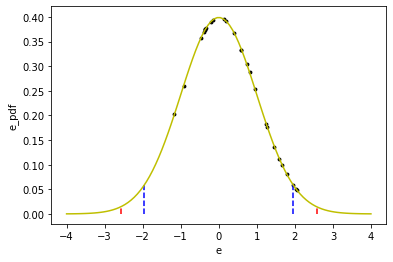

In [15]:
fig, ax = plt.subplots(1)
data_3_1_plot.plot(
    ax=ax,
    kind='scatter',
    x='e',
    y='e_pdf',
    s=8,
    c='black'
);


a=np.linspace(-4,4,100)
plt.plot(a,st.norm.pdf(a),color='y')


# 5%
x=st.norm.isf(0.025)
y=st.norm.pdf(x)
plt.vlines(st.norm.isf(0.025),0,y,ls='--' ,color='b');
plt.vlines(-st.norm.isf(0.025),0,y,ls='--',color='b');

# 1%
y2=st.norm.pdf(st.norm.isf(0.005))
plt.vlines(st.norm.isf(0.005),0,y2,ls='--',color='r');
plt.vlines(-st.norm.isf(0.005),0,y2,ls='--',color='r');

We can see that of the 27 observations, two numbers are not within the 95% confidence interval. While, all observations are within the 99% confidence interval.

But there is still a problem. It seems that most of the observations are on the right side(>0).

adjust the `N` to 5500

In [16]:
data_3_1_df = df_total.loc[:, ['password_1', 'password_2', 'password_3']]
#get Q
data_3_1_df['Q'] = data_3_1_df.mean(axis=1)

#get the mean and var of distributions--NQ
N=5500
data_3_1_df['mean'] = data_3_1_df['Q'].rolling(N).mean()

#the mean and var of NQ on theory
mean_theory_NQ= mean_theory_Q
var_theory_NQ= var_theory_Q/N

#get the independent distributions--NQ
data_3_1_plot = data_3_1_df.iloc[range(N-1, 5505, N ),4:]

#Standardize NQ
data_3_1_plot['e'] = (data_3_1_plot['mean']-mean_theory_NQ)/(var_theory_NQ)**0.5
data_3_1_plot['e_pdf']=st.norm.pdf(data_3_1_plot['e'])

`N=5500`

According to the `Central limit theorem`, NQ obeys independent normal distributions--`N(mean_theory_NQ,var_theory_NQ)`practically.

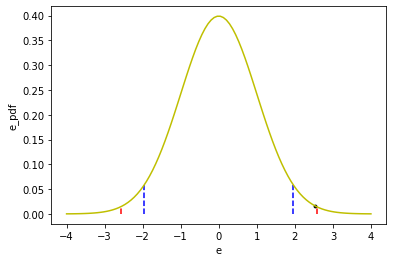

In [17]:
fig, ax = plt.subplots(1)
data_3_1_plot.plot(
    ax=ax,
    kind='scatter',
    x='e',
    y='e_pdf',
    s=8,
    c='black'
);

a=np.linspace(-4,4,100)
plt.plot(a,st.norm.pdf(a),color='y')

# 5%
x=st.norm.isf(0.025)
y=st.norm.pdf(x)
plt.vlines(st.norm.isf(0.025),0,y,ls='--' ,color='b');
plt.vlines(-st.norm.isf(0.025),0,y,ls='--',color='b');

# 1%
y2=st.norm.pdf(st.norm.isf(0.005))
plt.vlines(st.norm.isf(0.005),0,y2,ls='--',color='r');
plt.vlines(-st.norm.isf(0.005),0,y2,ls='--',color='r');

We can see that the number is out of the 95% confidence interval, even on the edge the 99% confidence interval. As the same time,the observation is on the right side(>0).

So, the randomness of the numbers is not as perfect as we think.

# 4 the sale & ratio

## 4-1 In general

In [18]:
#get a dataframe with the complete time series
value = {'nan': np.nan}
time = pd.date_range(start='2004-11-14', end='2020-05-27')
df_time = pd.DataFrame(value, index=time)
a = [ 'way1', 'way2', 'way3', 'total_sales', 'total_prize']
data_4_1_df = df_time.merge(df_total.loc[:, a].dropna(),left_index=True, right_index= True , how="left").iloc[:, 1:]

### 4-1-1 the total sales

In [19]:
#get a dataframe with the mean of business quarter
data_4_1_Q=data_4_1_df.resample("BQ").mean()
data_4_1_Q.dropna(inplace=True)
data_4_1_Q['ratio_of_prize'] = data_4_1_Q.loc[:, 'total_prize']/data_4_1_Q.loc[:, 'total_sales']
data_4_1_Q['Y']=data_4_1_Q.index.year

data_4_1_Q.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2010-06-30 to 2020-06-30
Freq: BQ-DEC
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   way1            41 non-null     float64
 1   way2            41 non-null     float64
 2   way3            41 non-null     float64
 3   total_sales     41 non-null     float64
 4   total_prize     41 non-null     float64
 5   ratio_of_prize  41 non-null     float64
 6   Y               41 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.6 KB


In [20]:
#get a dataframe with the mean of year
data_4_1_Y=data_4_1_df.resample("Y").mean()
data_4_1_Y.dropna(inplace=True)
data_4_1_Y['ratio_of_prize'] = data_4_1_Y.loc[:, 'total_prize']/data_4_1_Y.loc[:, 'total_sales']
data_4_1_Y['Y']=data_4_1_Y.index.year
data_4_1_Y.head()

,way1,way2,way3,total_sales,total_prize,ratio_of_prize,Y
2010-12-31,8169.415323,2431.403226,12527.794355,2.250945e+07,1.095191e+07,0.486547,2010
2011-12-31,8773.952514,1963.958101,11970.259777,2.317832e+07,1.131766e+07,0.488286,2011
2012-12-31,7589.482249,2025.369822,9459.044379,1.981185e+07,9.751048e+06,0.492183,2012
2013-12-31,6574.768025,1757.429467,7981.943574,1.720629e+07,8.414256e+06,0.489022,2013
2014-12-31,5801.340502,1585.340502,6981.899642,1.567297e+07,7.594769e+06,0.484578,2014


In [21]:
#merge them
data_4_1_QY=data_4_1_Q.reset_index().merge(data_4_1_Y.reset_index(), on='Y', how='left').set_index('index_x')
data_4_1_QY.head()
data_4_1_QY['Q/Y']= data_4_1_QY['total_sales_x']/data_4_1_QY['total_sales_y']
data_4_1_QY.head()

,way1_x,way2_x,way3_x,total_sales_x,total_prize_x,ratio_of_prize_x,Y,index_y,way1_y,way2_y,way3_y,total_sales_y,total_prize_y,ratio_of_prize_y,Q/Y
index_x,,,,,,,,,,,,,,,
2010-06-30,7657.468750,2062.234375,12303.546875,2.328062e+07,1.028595e+07,0.441825,2010,2010-12-31,8169.415323,2431.403226,12527.794355,2.250945e+07,1.095191e+07,0.486547,1.034260
2010-09-30,8477.021739,2239.652174,12485.782609,2.190322e+07,1.119144e+07,0.510949,2010,2010-12-31,8169.415323,2431.403226,12527.794355,2.250945e+07,1.095191e+07,0.486547,0.973068
2010-12-31,8217.945652,2879.967391,12725.804348,2.257920e+07,1.117566e+07,0.494954,2010,2010-12-31,8169.415323,2431.403226,12527.794355,2.250945e+07,1.095191e+07,0.486547,1.003099
2011-03-31,7997.963855,2315.421687,11951.722892,2.382693e+07,1.065117e+07,0.447022,2011,2011-12-31,8773.952514,1963.958101,11970.259777,2.317832e+07,1.131766e+07,0.488286,1.027983
2011-06-30,9213.142857,2253.626374,11893.230769,2.502334e+07,1.183722e+07,0.473047,2011,2011-12-31,8773.952514,1963.958101,11970.259777,2.317832e+07,1.131766e+07,0.488286,1.079601


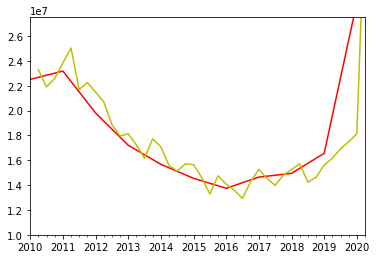

In [22]:
fig, ax = plt.subplots(1)

data_4_1_Y['total_sales'].plot(
    ax=ax,
    color='r',
    ylim=[10**7,2.75*10**7]
);

data_4_1_Q['total_sales'].plot(
    ax=ax,
    color='y',
    ylim=[10**7,2.75*10**7]
);

from this,we can see that:

Sales declined significantly between 2011 and 2016.

The sales volume rose slowly from 2016 to 2019.(Sales are rising rapidly in 2020, possibly due to missing data.)

Sales tend to fluctuate between quarters.

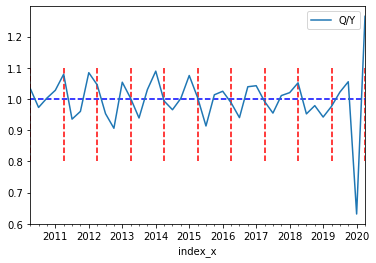

In [23]:
fig, ax = plt.subplots(1)
data_4_1_QY.plot(
    ax=ax,
    y='Q/Y'
);
plt.hlines(1,'2010-06-30','2020-06-30',ls='--' ,color='b');
for i in range(2010,2021,1):
    a=f'{i}'+'-06-30'
    plt.vlines(a, 0.8,1.1,ls='--',color='r');

from this,we can see that:

Sales fluctuate clearly from quarter to quarter.Sales in the first quarter are often higher than other quarters.

### 4-1-2 the ratio of prize
Let's discuss the ratio of prize to sales.

From 2010 to 2014, this ratio was set at around 50%. 

From August 2014, this ratio was set to 52%.

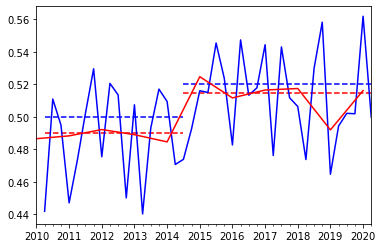

In [24]:
fig, ax = plt.subplots(1)

data_4_1_Q['ratio_of_prize'].plot(
    ax=ax,
    color='b'
);

data_4_1_Y['ratio_of_prize'].plot(
    ax=ax,
    color='r'
);

plt.hlines(0.5,'2010-06-30','2014-07-30',ls='--' ,color='b');
plt.hlines(0.52,'2014-07-30','2020-06-30',ls='--' ,color='b');
plt.hlines(0.49,'2010-06-30','2014-07-30',ls='--' ,color='r');
plt.hlines(0.515,'2014-07-30','2020-06-30',ls='--' ,color='r');

We can see that the actual ratio is often smaller than the set ratio. 

Since 2014, the annual average ratio has exceeded the set ratio only once.

Before 2014, the actual ratio of annual averages was always around 0.45, lower than 0.5.

## 4-2 some details

In [25]:
value = {'nan': np.nan}
time = pd.date_range(start='2004-11-14', end='2020-05-27')
df_time = pd.DataFrame(value, index=time)
a = [ 'way1', 'way2', 'way3', 'total_sales', 'total_prize', 'ratio_of_prize']
data_4_2_df = df_time.merge(df_total.loc[:, a].dropna(),left_index=True, right_index= True , how="left").iloc[:, 1:]
#data_4_2_df['day']=data_4_2_df.index.year()

data_4_2_df['year']=data_4_2_df.index.year
data_4_2_df['weekofyear']=data_4_2_df.index.weekofyear
data_4_2_df['dayofweek']=data_4_2_df.index.dayofweek

data_4_2_df['day']=data_4_2_df.index.day
data_4_2_df['month']=data_4_2_df.index.month

data_4_2_df.head()

,way1,way2,way3,total_sales,total_prize,ratio_of_prize,year,weekofyear,dayofweek,day,month
2004-11-14,NaN,NaN,NaN,NaN,NaN,NaN,2004,46,6,14,11
2004-11-15,NaN,NaN,NaN,NaN,NaN,NaN,2004,47,0,15,11
2004-11-16,NaN,NaN,NaN,NaN,NaN,NaN,2004,47,1,16,11
2004-11-17,NaN,NaN,NaN,NaN,NaN,NaN,2004,47,2,17,11
2004-11-18,NaN,NaN,NaN,NaN,NaN,NaN,2004,47,3,18,11


### 4-2-1  week

In [26]:
data_4_2_1_df=data_4_2_df.loc[:, ['year', 'weekofyear', 'dayofweek', 'total_sales']]
data_4_2_1_df.head()

,year,weekofyear,dayofweek,total_sales
2004-11-14,2004,46,6,NaN
2004-11-15,2004,47,0,NaN
2004-11-16,2004,47,1,NaN
2004-11-17,2004,47,2,NaN
2004-11-18,2004,47,3,NaN


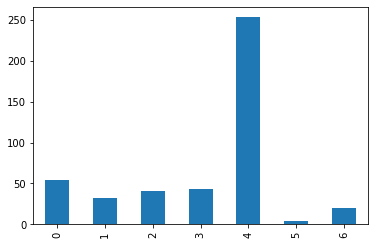

In [27]:
b=data_4_2_1_df.pivot_table( index=['year','weekofyear'], columns="dayofweek", values='total_sales').dropna()
b.idxmax(axis=1).value_counts().sort_index().plot.bar();

It can be clearly seen that the lottery with the results announced on Friday had the best sales in a week. While, the lottery with the results announced on Saturday had the worst sales.

So people are more inclined to buy lottery tickets with the results announced on Friday.

### 4-2-2  month

How about the month?

In [28]:
data_4_2_2_df=data_4_2_df.loc[:, ['year', 'month', 'day', 'total_sales']]
data_4_2_2_df.head()

,year,month,day,total_sales
2004-11-14,2004,11,14,NaN
2004-11-15,2004,11,15,NaN
2004-11-16,2004,11,16,NaN
2004-11-17,2004,11,17,NaN
2004-11-18,2004,11,18,NaN


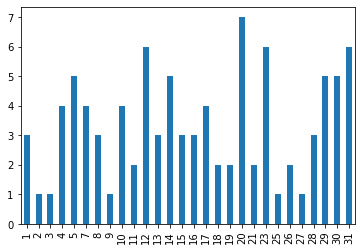

In [29]:
b=indexs_full=data_4_2_2_df.pivot_table(index=['year','month'], columns="day", values='total_sales')
indexs_full=b.isnull().sum(axis=1)<4

b.loc[indexs_full, :].idxmax(axis=1).value_counts().sort_index().plot.bar();

We can't find out much obvious from this picture.